# Beispiel 5.2: Auswertung experimenteller Daten

Dieses Beispiel befindet sich im Lehrbuch auf den Seiten 54 - 55. Die Nummerierung der verwendeten Gleichungen entspricht der Nummerierung im Lehrbuch. Im ersten Teil entspricht das angewendete Vorgehen dem im Lehrbuch vorgestellten Lösungsweg. Anschließend wird die moderne Vorgehensweise mittels modellgestützter Parameterbestimmung vorgestellt.

Zunächst werden die benötigten Pakete importiert und die experimentellen Daten eingegeben. Gegeben sind Verläufe der Konzentration, $c_1$, als Funktion der Zeit, $t$, für verschiedene Temperaturen, $T$.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ
from lmfit import Model, Minimizer, Parameters, report_fit
from scipy.optimize import Bounds, curve_fit

# Daten für Abbildung 5.2
# Zeit t in h
time = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2])
# Konzentration c in mol/m3
conc = np.array([[100, 97.14, 94.36, 91.66, 89.04, 86.50, 84.02, 81.62, 79.29, 77.02, 74.82, 72.68, 70.60, 68.58, 66.62, 64.71, 62.86, 61.07, 59.32, 57.62, 55.98],
                [100, 90.48, 81.86, 74.06, 67.01, 60.63, 54.85, 49.63, 44.90, 40.63, 36.76, 33.26, 30.09, 27.22, 24.63, 22.29, 20.16, 18.24, 16.51, 14.93, 13.51],
                [100, 73.29, 53.71, 39.37, 28.85, 21.14, 15.50, 11.38, 8.32, 6.10, 4.47, 3.28, 2.40, 1.76, 1.29, 0.95, 0.69, 0.51, 0.37, 0.27, 0.20],])
# Temperatur T in °C bzw. nach Umrechnung in K
Temps = np.array([50, 65, 80])+273

## Einfache Methode

Nun wird aus den Daten die Reaktionsgeschwindigkeit $r$ berechnet. Dazu werden die Daten mit der Funktion _gradient_ numerisch differenziert, um folgende Gleichung umzusetzen:

\begin{equation*}
    r = \frac{1}{\nu_1}\frac{dc_1}{dt}\approx\frac{\Delta c_1}{\Delta t}
\end{equation*}

Anschließend werden die Reaktionsgeschwindigkeiten und Konzentrationen logarithmiert.

In [12]:
rate = np.empty_like(conc)
lnrate = np.empty_like(conc)
lnconc = np.empty_like(conc)
for i in range(conc.shape[0]):
    rate[i] = -np.gradient(conc[i], time)
    lnrate[i] = np.log(rate[i])
    lnconc[i] = np.log(conc[i])

Die kinetischen Parameter lassen sich nun fitten, indem eine linearer Zusammehang zwischen der logarithmierten Reaktionsgeschwindigkeit und der logarithmierten Konzentration angenommen wird ngem. folgendem Zusammenhang:

\begin{equation*}
    \ln(r) = n \ln(c_1) + \ln(k)
\end{equation*}

Darin ist $n$ die Reaktionsordnung und $k(T)$ die temperaturabhängige Reaktionsgeschwindigkeitskonstante. Zum Fitten wird zunächst die lineare Funktion _lin_ definiert. Anschließend wird das Fitting mit der Funktion _curve_fit_ durchgeführt. Von den Ergebnissen werden nur die Parameter _lnk_params_ selbst weiter verwendet.

Am Ende des folgenden Code-Schnipsels werden die Ergebnisse für die drei gemessenen Temperaturen als Vektoren ausgegeben.

In [13]:
def lin(x, m, b):
    return m*x+b

lnk = np.empty(conc.shape[0])
order = np.empty(conc.shape[0])
for i in range(conc.shape[0]):
    lnk_params, lnk_cov = curve_fit(lin, xdata = lnconc[i,:], ydata = lnrate[i,:], bounds=((0.99,-2),(1.01,2)))
    lnk[i] = lnk_params[1]
    order[i] = lnk_params[0]

print('orders, n = ',  order)
print('kinetic constants, ln(k) = ', lnk)

orders, n =  [0.99000348 0.99000017 0.99000001]
kinetic constants, ln(k) =  [-1.19440973  0.03841657  1.16277676]


Die Linearisierung der ARRHENIUS-Gleichung ergibt:

\begin{equation*}
    \ln(k) = -\frac{E_A}{R}\frac{1}{T} + \ln(k_0) = -\frac{E_A}{R}\frac{1000}{T'} + \ln(k_0)
\end{equation*}

Das Fitting erfolgt analog zu oben auf Basis der selben lineren Funktion. Die erhaltene Aktivierungsenergie und der präexponentielle Faktor werden ausgegeben.

In [14]:
Ea_params, Ea_cov = curve_fit(lin, xdata = 1000/Temps, ydata = lnk)
lin_Ea = Ea_params[0]*8.314*1000
lin_k0 = np.exp(Ea_params[1])

str_Ea = 'Ea = {:.2f} kJ/mol'.format(-lin_Ea/1000)
str_k0 = 'k0 = {:.2e} 1/s'.format(lin_k0)

print(str_Ea)
print(str_k0)

Ea = 74.49 kJ/mol
k0 = 3.37e+11 1/s


Die einzelnen Schritte werden im Folgenden grafisch illustriert. 

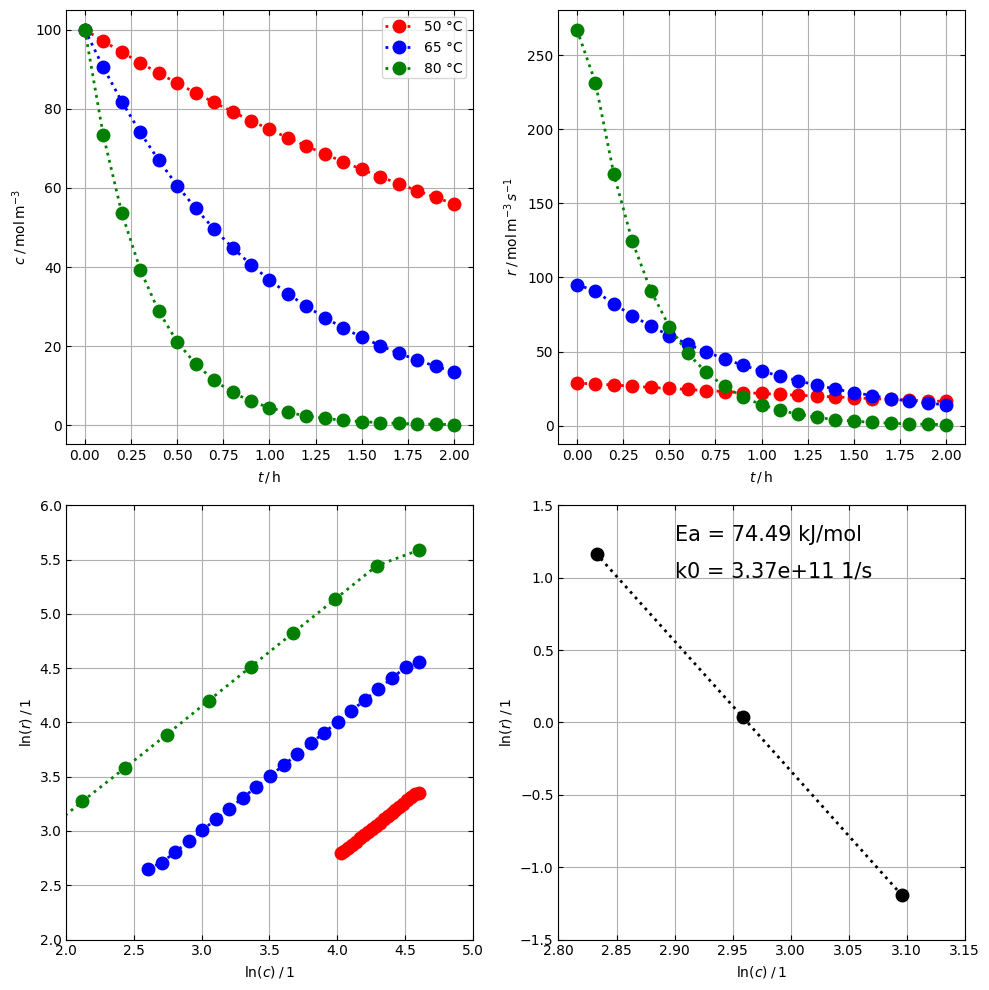

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 10))
ax1.grid()
ax1.plot(time, conc[0,:], 'ro:', linewidth=2, markersize=9, label=str(Temps[0]-273)+' °C')
ax1.plot(time, conc[1,:], 'bo:', linewidth=2, markersize=9, label=str(Temps[1]-273)+' °C')
ax1.plot(time, conc[2,:], 'go:', linewidth=2, markersize=9, label=str(Temps[2]-273)+' °C')
ax1.tick_params(axis="y",direction="in", right = True)
ax1.tick_params(axis="x",direction="in", top = True)
ax1.set_ylabel(r'$c\; / \, \mathrm{mol \, m^{-3}}$')
ax1.set_xlabel(r'$t\, / \, \mathrm{h}$')
ax1.legend(loc="best", borderpad=0.2)

ax2.grid()
ax2.plot(time, rate[0,:], 'ro:', linewidth=2, markersize=9, label=str(Temps[0]-273)+' °C')
ax2.plot(time, rate[1,:], 'bo:', linewidth=2, markersize=9, label=str(Temps[1]-273)+' °C')
ax2.plot(time, rate[2,:], 'go:', linewidth=2, markersize=9, label=str(Temps[2]-273)+' °C')
ax2.tick_params(axis="y",direction="in", right = True)
ax2.tick_params(axis="x",direction="in", top = True)
ax2.set_ylabel(r'$r\; / \, \mathrm{mol \, m^{-3}} \, s^{-1}$')
ax2.set_xlabel(r'$t\, / \, \mathrm{h}$')

ax3.grid()
ax3.plot(lnconc[0,:], lnrate[0,:], 'ro:', linewidth=2, markersize=9, label=str(Temps[0]-273)+' °C')
ax3.plot(lnconc[1,:], lnrate[1,:], 'bo:', linewidth=2, markersize=9, label=str(Temps[1]-273)+' °C')
ax3.plot(lnconc[2,:], lnrate[2,:], 'go:', linewidth=2, markersize=9, label=str(Temps[2]-273)+' °C')
ax3.tick_params(axis="y",direction="in", right = True)
ax3.tick_params(axis="x",direction="in", top = True)
ax3.set_ylabel(r'$\mathrm{ln}(r)\; / \, 1$')
ax3.set_xlabel(r'$\mathrm{ln}(c)\; / \, 1$')
ax3.set_xlim(2,5)
ax3.set_ylim(2,6)

ax4.grid()
ax4.plot(1000/Temps, lnk, 'ko:', linewidth=2, markersize=9, label=str(Temps[0]-273)+' °C')
ax4.annotate(str_Ea,(2.9, 1.25), fontsize = 15, rotation = 0)
ax4.annotate(str_k0,(2.9, 1.00), fontsize = 15, rotation = 0)
ax4.tick_params(axis="y",direction="in", right = True)
ax4.tick_params(axis="x",direction="in", top = True)
ax4.set_ylabel(r'$\mathrm{ln}(r)\; / \, 1$')
ax4.set_xlabel(r'$\mathrm{ln}(c)\; / \, 1$')
ax4.set_xlim(2.8,3.15)
ax4.set_ylim(-1.5,1.5)

plt.tight_layout()
plt.show()

Die vorgestellte Methode ist mit einfachsten mathematischen Mittel umsetzbar. Das Fitting der Parameter kann dabei auch grafisch oder mittels Tabellenkalkulation erfolgen. Die Überprüfung der gefitteten Parameter durch den Vergleich von Experiment und Simulation ist mit dieser Methode aber nicht direkt möglich. Dafür wäre ein Modell erforderlich, das die Konzentrations-Zeit-Verläufe mit Hilfe der kinetischen Parameter simuliert. Wie im Beispiel genannt, wurden die Daten in einem diskontinuierlichen Rührkesselreaktor aufgenommen, sodass ein entsprechendes Modell erforderlich ist.

## Modellgestützte Methode

### Grundkonzept für einzelnen Datensatz

Die moderne Variante der Parameterbestimmung basiert vollständig auf numerischen Lösungsalgorithmen, was im Folgenden skizziert werden soll. Zunächst wird in der Funktion _balance_Temp_ die Materialbilanz für einen diskontinuierlichen Rührkesselreaktor implementiert. Basierend auf Glg. (8.2) ergeibt sich für eine einfache, irreversible Reaktion 1. Ordnung und $\nu_1 = -1$:

\begin{equation*}
    \frac{dc_1}{dt} = -k_0 \, \exp\left(-\frac{E_A}{R\,T}\right)\,c_1
\end{equation*}

Diese gewöhnliche Differentialgleichung stellt ein Anfangswertproblem dar und wird mit der Funktion _solve_ivp_ gelöst. Die Lösung wird innerhalb der Funktion _sim_exp_Temp_ ausgeführt.

In [16]:
def balance_Temp(time, c, params, T):
    k0 = params['k0'].value
    Ea = params['Ea'].value
    R = 8.314
    dcdt = -k0 * np.exp(-Ea / (R * T)) * c
    return dcdt

def sim_exp_Temp(time, c_init, params, T):
    sol = integ.solve_ivp(balance_Temp, t_span=[time[0], time[-1]], y0=c_init, args=[params, T], t_eval=time)
    return sol.y

Zum Parameterfitting wird zunächst eine Funktion _resid_Temp_ definiert, die die Residuen zwischen Simulation und Messwerten berechnet. Anschließend werden die zu bestimmenden Parameter festgelegt und die _Minimizer_-Funktion aufgerufen. Diese Funktion minimiert die Residuen; als Ergebnis werden die Werte für $k_0$ und $E_A$ ausgegeben. Im konkreten Fall wird $E_A = 75 \mathrm{kJ mol^{-1}}$ festgelegt, da zunächst nur ein einzelner Konzentrations-Zeit-Verlauf gefittet wird und Informationen zum Temperatureinfluss in den Daten nicht enthalten sind.

In [17]:
def resid_Temp(params, time, data, T):
    sim_conc = sim_exp_Temp(time, [data[0]], params, T)
    return sim_conc[0] - data

data_set_eval = 1 # 0 : erster Datensatz mit T = 50°C; 0 : zweiter Datensatz mit T = 65°C;  0 : dritter Datensatz mit T = 80°C
params = Parameters()
params.add('k0', value=3.5e11, min=0, max=10e12, vary=True)
params.add('Ea', value=75e3, min=5e3, max=150e3, vary=False)
minner_Temp = Minimizer(resid_Temp, params, fcn_args=(time, conc[data_set_eval,:], Temps[data_set_eval]))
result_Temp = minner_Temp.minimize('nelder')
report_fit(result_Temp)
str_Ea = 'Ea = {:.2f} kJ/mol'.format(result_Temp.params['Ea'].value/1000)
str_k0 = 'k0 = {:.2e} 1/s'.format(result_Temp.params['k0'].value)

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 26
    # data points      = 21
    # variables        = 1
    chi-square         = 0.00933800
    reduced chi-square = 4.6690e-04
    Akaike info crit   = -160.081898
    Bayesian info crit = -159.037375
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    k0:  3.9023e+11 (init = 3.5e+11)
    Ea:  75000 (fixed)


Zum Vergleich der experimentellen und simulierten Daten wird die Bilanzgleichung nochmal mit den gefitteten Parametern gelöst und die Ergebnisse grafisch gegenübergestellt.

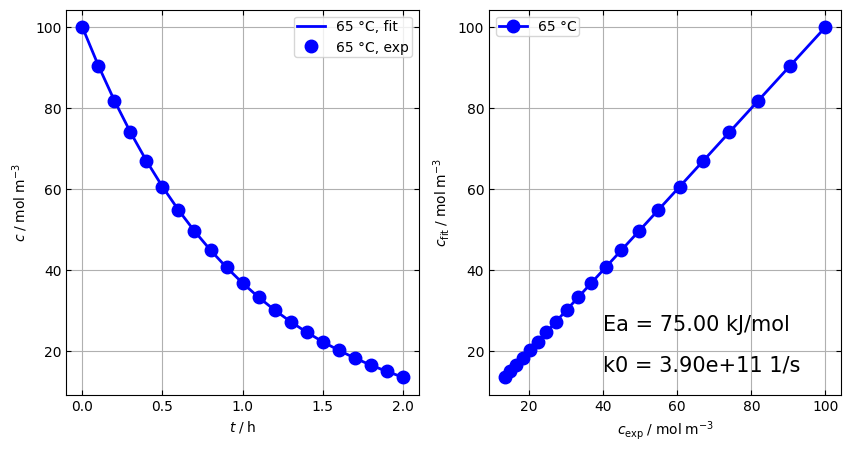

In [18]:
res_fit = integ.solve_ivp(balance_Temp, t_span=[time[0], time[-1]], y0=[conc[data_set_eval,0]], args=[result_Temp.params, Temps[data_set_eval]], t_eval=time)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.grid()
ax1.plot(res_fit.t, res_fit.y[0], 'b-', linewidth=2, label=str(Temps[data_set_eval]-273)+' °C, fit')
ax1.plot(time, conc[data_set_eval,:], 'bo', markersize=9, label=str(Temps[data_set_eval]-273)+' °C, exp')
ax1.tick_params(axis="y",direction="in", right = True)
ax1.tick_params(axis="x",direction="in", top = True)
ax1.set_ylabel(r'$c\; / \; \mathrm{mol \; m^{-3}}$')
ax1.set_xlabel(r'$t\; / \; \mathrm{h}$')
ax1.legend(loc="best", borderpad=0.2)

ax2.grid()
ax2.plot(conc[data_set_eval,:], res_fit.y[0], 'bo-', linewidth=2, markersize=9, label=str(Temps[data_set_eval]-273)+' °C')
ax2.tick_params(axis="y",direction="in", right = True)
ax2.tick_params(axis="x",direction="in", top = True)
ax2.annotate(str_Ea,(40.0, 25.0), fontsize = 15, rotation = 0)
ax2.annotate(str_k0,(40.0, 15.0), fontsize = 15, rotation = 0)
ax2.set_ylabel(r'$c_\mathrm{fit}\; / \; \mathrm{mol \; m^{-3}}$')
ax2.set_xlabel(r'$c_\mathrm{exp}\; / \; \mathrm{mol \; m^{-3}}$')
ax2.legend(loc="best", borderpad=0.2)

### Parallele Auswertung mehrerer Datensätze

Das vorgestellte Konzept ist auch auf das gleichzeitige Fitten der Parameter an mehrer Datensätze übertragbar. Im Folgenden werden die gemessenen Konzentrations-Zeit-Verläufe bei den drei verschiedenen Temperaturen zugrunde gelegt und die Parameter $k_0$ und $E_A$ gefittet. Dafür müssen die Funktionen zur Simulation, _sim_multi_exp_, und Residuenberechnung, _resid_Temp_multi_, so angepasst werden, dass mehrere experimentelle Datensätze ausgewertet werden können. Der _Minimizer_ kann unterschiedliche numerische Minimierungsmethoden verwenden, die hier zusammengestellt sind: https://lmfit.github.io/lmfit-py/fitting.html

Je nach eingesetzter Methode werden die Parameter und die Vertrauensbereiche ausgegeben.

In [19]:
def sim_multi_exp(time, c_init, params, T):
    sim_res = []
    n_exp = len(T)
    for i in range(n_exp):
        sim_res.append(sim_exp_Temp(time, [c_init[i]], params, T[i]))
    return sim_res

def resid_Temp_multi(params, time, c_inits, data, T):
    n_exp = len(T)
    sim_conc = sim_multi_exp(time, c_inits, params, T)
    concs_flat = np.array([])
    for i in np.arange(0, n_exp):
        concs_flat = np.append(concs_flat, sim_conc[i][0])
    return concs_flat - data.flatten()

c_inits = (conc[0,0], conc[1,0], conc[2,0])
params = Parameters()
params.add('k0', value=3.5e11, min=0, max=10e12, vary=True)
params.add('Ea', value=75e3, min=5e3, max=150e3, vary=True)
minner_Temp_multi = Minimizer(resid_Temp_multi, params, fcn_args=(time, c_inits, conc, Temps))
result_Temp_multi = minner_Temp_multi.minimize('leastsq')
report_fit(result_Temp_multi)
str_Ea = 'Ea = {:.2f} kJ/mol'.format(result_Temp_multi.params['Ea'].value/1000)
str_k0 = 'k0 = {:.2e} 1/s'.format(result_Temp_multi.params['k0'].value)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 63
    # variables        = 2
    chi-square         = 0.01189611
    reduced chi-square = 1.9502e-04
    Akaike info crit   = -536.204772
    Bayesian info crit = -531.918503
[[Variables]]
    k0:  3.8049e+11 +/- 8.8934e+08 (0.23%) (init = 3.5e+11)
    Ea:  74929.1108 +/- 6.54205477 (0.01%) (init = 75000)
[[Correlations]] (unreported correlations are < 0.100)
    C(k0, Ea) = +0.9995


Zum Vergleich der experimentellen und simulierten Daten wird die Bilanzgleichung nochmal mit den gefitteten Parametern gelöst und die Ergebnisse grafisch gegenübergestellt.

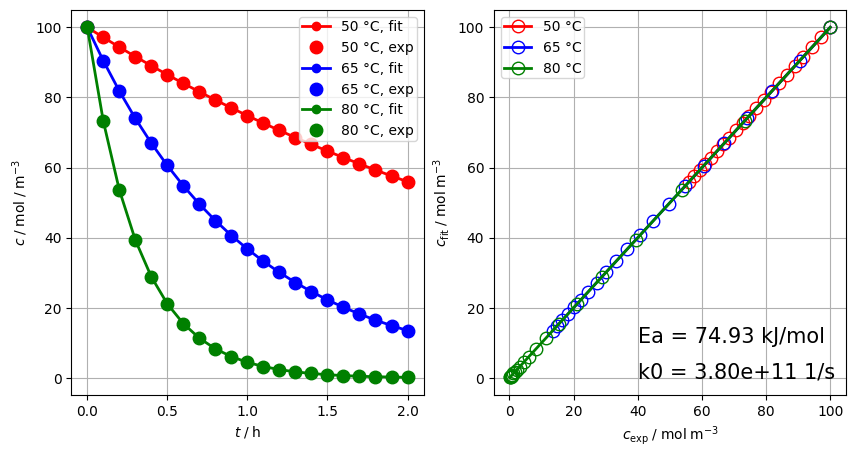

In [20]:
sim_res = np.empty_like(conc)
for i in range(conc.shape[0]):
    sim_res[i,:] = sim_exp_Temp(time, [conc[i,0]], result_Temp_multi.params, Temps[i])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.grid()
ax1.plot(res_fit.t, sim_res[0,:], 'ro-', linewidth=2, label=str(Temps[0]-273)+' °C, fit')
ax1.plot(time, conc[0,:], 'ro', markersize=9, label=str(Temps[0]-273)+' °C, exp')
ax1.plot(res_fit.t, sim_res[1,:], 'bo-', linewidth=2, label=str(Temps[1]-273)+' °C, fit')
ax1.plot(time, conc[1,:], 'bo', markersize=9, label=str(Temps[1]-273)+' °C, exp')
ax1.plot(res_fit.t, sim_res[2,:], 'go-', linewidth=2, label=str(Temps[2]-273)+' °C, fit')
ax1.plot(time, conc[2,:], 'go', markersize=9, label=str(Temps[2]-273)+' °C, exp')
ax1.set_xlabel(r'$t\; / \; \mathrm{h}$')
ax1.set_ylabel(r'$c\; / \; \mathrm{mol \; / \; m^{-3}}$')  #
ax1.legend(loc="best", borderpad=0.2)

ax2.grid()
ax2.plot(conc[0,:], sim_res[0,:], 'ro-', linewidth=2, markersize=9, markerfacecolor='none', label=str(Temps[0]-273)+' °C')
ax2.plot(conc[1,:], sim_res[1,:], 'bo-', linewidth=2, markersize=9, markerfacecolor='none', label=str(Temps[1]-273)+' °C')
ax2.plot(conc[2,:], sim_res[2,:], 'go-', linewidth=2, markersize=9, markerfacecolor='none', label=str(Temps[2]-273)+' °C')
ax2.annotate(str_Ea,(40.0, 10.0), fontsize = 15, rotation = 0)
ax2.annotate(str_k0,(40.0, 0.0), fontsize = 15, rotation = 0)
ax2.set_ylabel(r'$c_\mathrm{fit}\; / \; \mathrm{mol \; m^{-3}}$')
ax2.set_xlabel(r'$c_\mathrm{exp}\; / \; \mathrm{mol \; m^{-3}}$')
ax2.legend(loc="best", borderpad=0.2)